In [25]:
%matplotlib inline

In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
np.random.seed(0)
w = 0.5 * np.random.normal(size=(4,4))
b = np.zeros((4))

In [7]:
model1 = Sequential(name='model1')
model1.add(Dense(4, activation='sigmoid', input_shape=(4,), weights=(w, b), name='dense1'))
type(model1)

keras.models.Sequential

In [8]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


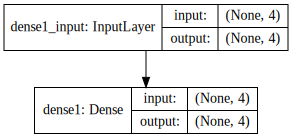

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
input_layer2 = Input(shape=(4,), name="input2")
hidden_layer2 = Dense(4, activation='sigmoid', weights=(w, b), name="dense2")(input_layer2)
model2 = Model(input_layer2, hidden_layer2, name="model2")
type(model2)

keras.engine.training.Model

In [11]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
dense2 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


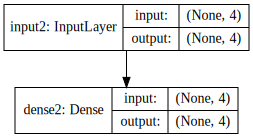

In [12]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
model3 = Model(input_layer2, model1(input_layer2), name="model3")
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


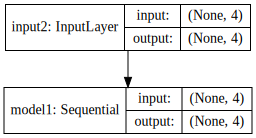

In [14]:
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
input_layer4 = Input(shape=(4,), name="input4")
model4 = Model(input_layer4, model2(input_layer4), name="model4")
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input4 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


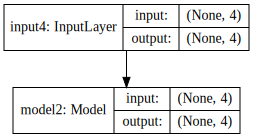

In [16]:
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

# DC GAN
 - discriminator - 일반적인 neural network
 - generator - training하고자 하는 목표

## Co-evolution
 - 이미지 생성기와 이미지 분별기가 서로 경쟁하며 트레이닝

## Generator

In [17]:
generator_ = Sequential()
generator_.add(Dense(128 * 7 * 7, activation="relu", input_shape=(100,)))
generator_.add(Reshape((7, 7, 128)))
generator_.add(BatchNormalization(momentum=0.8))
generator_.add(UpSampling2D())
generator_.add(Conv2D(128, kernel_size=3, padding="same"))
generator_.add(Activation("relu"))
generator_.add(BatchNormalization(momentum=0.8)) 
generator_.add(UpSampling2D())
generator_.add(Conv2D(64, kernel_size=3, padding="same"))
generator_.add(Activation("relu"))
generator_.add(BatchNormalization(momentum=0.8))
generator_.add(Conv2D(1, kernel_size=3, padding="same"))
generator_.add(Activation("tanh"))

In [18]:
noise_input = Input(shape=(100,), name="noise_input")
generator = Model(noise_input, generator_(noise_input), name="generator")

In [19]:
generator_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)       512       
__________

In [20]:
optimizer = Adam(0.0002, 0.5)

In [21]:
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

In [22]:
noise_data = np.random.normal(0, 1, (32, 100))
generated_images = 0.5 * generator.predict(noise_data) + 0.5
generated_images.shape

(32, 28, 28, 1)

In [23]:
def show_images(generated_images, n=4, m=8, figsize=(9, 5)):
    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    for i in range(n):
        for j in range(m):
            k = i * m + j
            ax = fig.add_subplot(n, m, i * m + j + 1)
            ax.imshow(generated_images[k][:, :, 0], cmap=plt.cm.bone)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


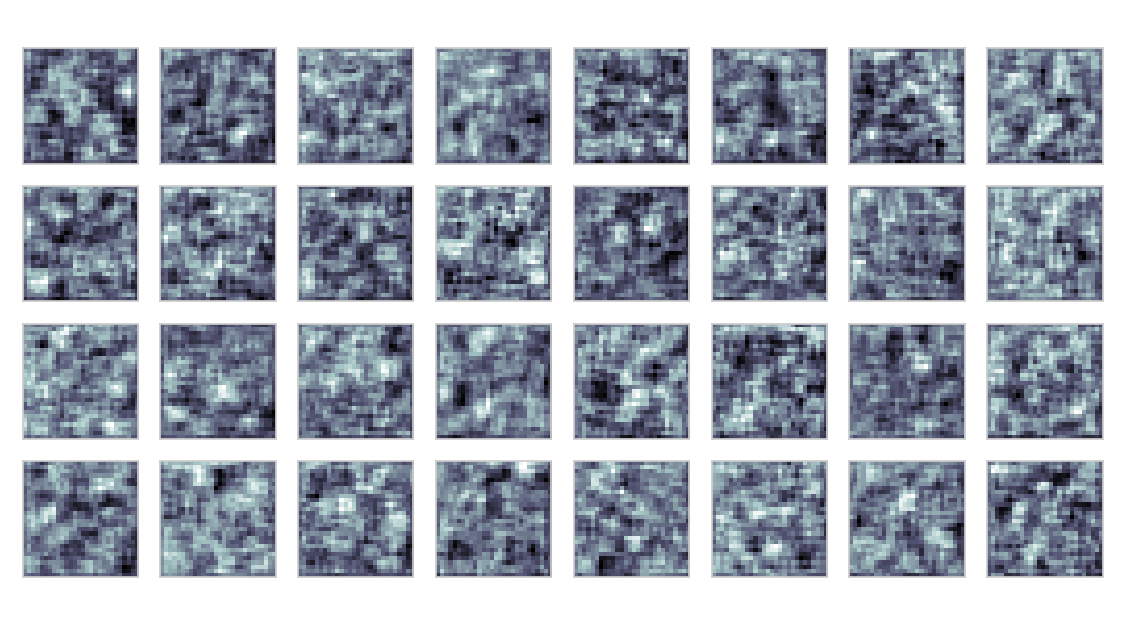

In [24]:
show_images(generated_images)

# Discriminator
 - 일반적인 CNN
 - binary classification으로 0과 1만 출력하는것이 차이

# 시계열 자료와 확률 과정